## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [14]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2019-02-13 19:19:53--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.0.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.0.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  6.38MB/s    in 26s     

2019-02-13 19:20:20 (12.4 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_10.jpg

In [1]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!pip install torchsummary

scikit-umfpack 0.3.2 has requirement numpy>=1.15.3, but you'll have numpy 1.15.1 which is incompatible.
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 2.2.3 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.2.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.1.0 which is incompatible.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

from torchsummary import summary

net = Net()
print(net)

summary(net, input_size = (1, 224, 224))

/floyd/home/models.py:46: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.fc2.weight.data)
/floyd/home/models.py:47: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.fc3.weight.data)
/floyd/home/models.py:48: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  
/floyd/home/models.py:50: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.conv2.weight.data)
/floyd/home/models.py:51: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.conv3.weight.data)
/floyd/home/models.py:52: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.conv4.weight.data)
/floyd/home/models.py:53: UserWarning: nn.init.xavier_uniform is now deprecated in f

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=36864, out_features=1000, bias=True)
  (bn5): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=6000, out_features=1000, bias=True)
  (bn6): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_ru

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [4]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform =  transforms.Compose([
    Rescale(250),
    RandomCrop(224),
    Normalize(),
    ToTensor()]
)

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [5]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [6]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [7]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',
                                             root_dir='data/test/',
                                             transform=data_transform)



In [8]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Make sure the image is a FloatTensor, which the model expects.
3. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [9]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [10]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [11]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

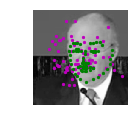

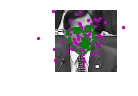

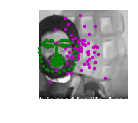

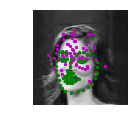

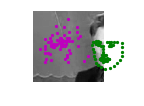

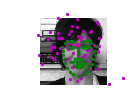

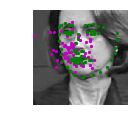

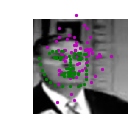

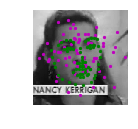

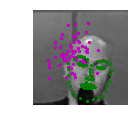

In [26]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [27]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = torch.nn.MSELoss()

learning_rate = 0.001
optimizer = optim.Adam(net.parameters(), lr = learning_rate)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [28]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to the running_loss, use .item()
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/1000))
                running_loss = 0.0

    print('Finished Training')


In [29]:
# train your network
n_epochs = 10 # start small, and increase when you've decided on your model structure and hyperparams

train_net(n_epochs)

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.012014777719974518
Epoch: 1, Batch: 20, Avg. Loss: 0.005947719991207123
Epoch: 1, Batch: 30, Avg. Loss: 0.0051302148401737215
Epoch: 1, Batch: 40, Avg. Loss: 0.004039705246686936
Epoch: 1, Batch: 50, Avg. Loss: 0.0028054338842630386
Epoch: 1, Batch: 60, Avg. Loss: 0.002365929290652275
Epoch: 1, Batch: 70, Avg. Loss: 0.002256108060479164
Epoch: 1, Batch: 80, Avg. Loss: 0.002313997454941273
Epoch: 1, Batch: 90, Avg. Loss: 0.0021519093364477156
Epoch: 1, Batch: 100, Avg. Loss: 0.0020940995290875436
Epoch: 1, Batch: 110, Avg. Loss: 0.002289867900311947
Epoch: 1, Batch: 120, Avg. Loss: 0.0022644974440336227
Epoch: 1, Batch: 130, Avg. Loss: 0.002029688008129597
Epoch: 1, Batch: 140, Avg. Loss: 0.002304045498371124
Epoch: 1, Batch: 150, Avg. Loss: 0.002498579725623131
Epoch: 1, Batch: 160, Avg. Loss: 0.0019053034707903862
Epoch: 1, Batch: 170, Avg. Loss: 0.0015321587175130844
Epoch: 1, Batch: 180, Avg. Loss: 0.0018865592777729035
Epoch: 1, Batch: 190, Avg. Lo

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.0015848288238048554
Epoch: 2, Batch: 20, Avg. Loss: 0.001751525953412056
Epoch: 2, Batch: 30, Avg. Loss: 0.0018409333229064942
Epoch: 2, Batch: 40, Avg. Loss: 0.0018970375210046768
Epoch: 2, Batch: 50, Avg. Loss: 0.0021211693212389946
Epoch: 2, Batch: 60, Avg. Loss: 0.001521196685731411
Epoch: 2, Batch: 70, Avg. Loss: 0.0018315502777695655
Epoch: 2, Batch: 80, Avg. Loss: 0.0016303600668907165
Epoch: 2, Batch: 90, Avg. Loss: 0.003268448568880558
Epoch: 2, Batch: 100, Avg. Loss: 0.0017991906926035882
Epoch: 2, Batch: 110, Avg. Loss: 0.0015681677460670472
Epoch: 2, Batch: 120, Avg. Loss: 0.0017106641978025436
Epoch: 2, Batch: 130, Avg. Loss: 0.0017482218891382217
Epoch: 2, Batch: 140, Avg. Loss: 0.0020154614821076395
Epoch: 2, Batch: 150, Avg. Loss: 0.0015574501417577266
Epoch: 2, Batch: 160, Avg. Loss: 0.0015433605685830115
Epoch: 2, Batch: 170, Avg. Loss: 0.0014216514378786087
Epoch: 2, Batch: 180, Avg. Loss: 0.0018714131191372872
Epoch: 2, Batch: 190, 

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.0015936964899301528
Epoch: 3, Batch: 20, Avg. Loss: 0.0013992281556129455
Epoch: 3, Batch: 30, Avg. Loss: 0.0014804230853915214
Epoch: 3, Batch: 40, Avg. Loss: 0.0017409574389457704
Epoch: 3, Batch: 50, Avg. Loss: 0.0014149676635861396
Epoch: 3, Batch: 60, Avg. Loss: 0.0013613299205899238
Epoch: 3, Batch: 70, Avg. Loss: 0.001250931240618229
Epoch: 3, Batch: 80, Avg. Loss: 0.0014939139038324357
Epoch: 3, Batch: 90, Avg. Loss: 0.0014543251469731331
Epoch: 3, Batch: 100, Avg. Loss: 0.0009191947877407074
Epoch: 3, Batch: 110, Avg. Loss: 0.000974716480821371
Epoch: 3, Batch: 120, Avg. Loss: 0.001147392250597477
Epoch: 3, Batch: 130, Avg. Loss: 0.0014459160193800926
Epoch: 3, Batch: 140, Avg. Loss: 0.0011641853377223014
Epoch: 3, Batch: 150, Avg. Loss: 0.0008448986224830151
Epoch: 3, Batch: 160, Avg. Loss: 0.00114366240426898
Epoch: 3, Batch: 170, Avg. Loss: 0.0011158924028277398
Epoch: 3, Batch: 180, Avg. Loss: 0.0009957605935633183
Epoch: 3, Batch: 190, Av

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.0010285544767975807
Epoch: 4, Batch: 20, Avg. Loss: 0.0013406634740531444
Epoch: 4, Batch: 30, Avg. Loss: 0.0014062500596046447
Epoch: 4, Batch: 40, Avg. Loss: 0.0027090962380170824
Epoch: 4, Batch: 50, Avg. Loss: 0.0016632220670580863
Epoch: 4, Batch: 60, Avg. Loss: 0.0009765269383788109
Epoch: 4, Batch: 70, Avg. Loss: 0.0012026435323059558
Epoch: 4, Batch: 80, Avg. Loss: 0.0010886391140520573
Epoch: 4, Batch: 90, Avg. Loss: 0.00091255908831954
Epoch: 4, Batch: 100, Avg. Loss: 0.0012092342302203179
Epoch: 4, Batch: 110, Avg. Loss: 0.0013471863865852356
Epoch: 4, Batch: 120, Avg. Loss: 0.001121895235031843
Epoch: 4, Batch: 130, Avg. Loss: 0.0010097146444022656
Epoch: 4, Batch: 140, Avg. Loss: 0.001129104856401682
Epoch: 4, Batch: 150, Avg. Loss: 0.0008990493007004261
Epoch: 4, Batch: 160, Avg. Loss: 0.0012830612398684025
Epoch: 4, Batch: 170, Avg. Loss: 0.0009183949790894985
Epoch: 4, Batch: 180, Avg. Loss: 0.0009101429730653763
Epoch: 4, Batch: 190, A

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.0013394297137856483
Epoch: 5, Batch: 20, Avg. Loss: 0.0017575943917036057
Epoch: 5, Batch: 30, Avg. Loss: 0.0007916352283209563
Epoch: 5, Batch: 40, Avg. Loss: 0.0009381076395511628
Epoch: 5, Batch: 50, Avg. Loss: 0.001209526464343071
Epoch: 5, Batch: 60, Avg. Loss: 0.0008934534043073654
Epoch: 5, Batch: 70, Avg. Loss: 0.0008113197274506092
Epoch: 5, Batch: 80, Avg. Loss: 0.0008034676313400269
Epoch: 5, Batch: 90, Avg. Loss: 0.001169203020632267
Epoch: 5, Batch: 100, Avg. Loss: 0.0009565353132784366
Epoch: 5, Batch: 110, Avg. Loss: 0.0009915922954678537
Epoch: 5, Batch: 120, Avg. Loss: 0.0014590042009949684
Epoch: 5, Batch: 130, Avg. Loss: 0.0009197882451117039
Epoch: 5, Batch: 140, Avg. Loss: 0.0008343154937028884
Epoch: 5, Batch: 150, Avg. Loss: 0.0007854357026517391
Epoch: 5, Batch: 160, Avg. Loss: 0.0007567625343799591
Epoch: 5, Batch: 170, Avg. Loss: 0.000951312705874443
Epoch: 5, Batch: 180, Avg. Loss: 0.0009380215927958488
Epoch: 5, Batch: 190, 

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.000984455320984125
Epoch: 6, Batch: 20, Avg. Loss: 0.0012203051969408988
Epoch: 6, Batch: 30, Avg. Loss: 0.001060643568634987
Epoch: 6, Batch: 40, Avg. Loss: 0.0007655988596379756
Epoch: 6, Batch: 50, Avg. Loss: 0.0009260323867201805
Epoch: 6, Batch: 60, Avg. Loss: 0.003013810761272907
Epoch: 6, Batch: 70, Avg. Loss: 0.0009399027489125729
Epoch: 6, Batch: 80, Avg. Loss: 0.0011097744219005108
Epoch: 6, Batch: 90, Avg. Loss: 0.000913373850286007
Epoch: 6, Batch: 100, Avg. Loss: 0.0007617125809192657
Epoch: 6, Batch: 110, Avg. Loss: 0.0007400890178978443
Epoch: 6, Batch: 120, Avg. Loss: 0.0007792524583637714
Epoch: 6, Batch: 130, Avg. Loss: 0.0007522035613656044
Epoch: 6, Batch: 140, Avg. Loss: 0.0009266575500369072
Epoch: 6, Batch: 150, Avg. Loss: 0.000773199062794447
Epoch: 6, Batch: 160, Avg. Loss: 0.0008797031156718731
Epoch: 6, Batch: 170, Avg. Loss: 0.0011337774395942688
Epoch: 6, Batch: 180, Avg. Loss: 0.0010740383230149746
Epoch: 6, Batch: 190, Av

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.0006617318280041218
Epoch: 7, Batch: 20, Avg. Loss: 0.0010638850368559361
Epoch: 7, Batch: 30, Avg. Loss: 0.0005839772801846265
Epoch: 7, Batch: 40, Avg. Loss: 0.0010864520724862814
Epoch: 7, Batch: 50, Avg. Loss: 0.0006165671087801456
Epoch: 7, Batch: 60, Avg. Loss: 0.0006995630264282226
Epoch: 7, Batch: 70, Avg. Loss: 0.0010602166801691056
Epoch: 7, Batch: 80, Avg. Loss: 0.0007273023203015328
Epoch: 7, Batch: 90, Avg. Loss: 0.0009124195948243141
Epoch: 7, Batch: 100, Avg. Loss: 0.0008422210216522217
Epoch: 7, Batch: 110, Avg. Loss: 0.0012739909291267395
Epoch: 7, Batch: 120, Avg. Loss: 0.0010388125050812959
Epoch: 7, Batch: 130, Avg. Loss: 0.0006444813907146453
Epoch: 7, Batch: 140, Avg. Loss: 0.0008495112396776676
Epoch: 7, Batch: 150, Avg. Loss: 0.0007475726362317801
Epoch: 7, Batch: 160, Avg. Loss: 0.0008364403136074543
Epoch: 7, Batch: 170, Avg. Loss: 0.001160039946436882
Epoch: 7, Batch: 180, Avg. Loss: 0.000852119691669941
Epoch: 7, Batch: 190,

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.0007961780484765768
Epoch: 8, Batch: 20, Avg. Loss: 0.0009484120905399323
Epoch: 8, Batch: 30, Avg. Loss: 0.0007847078926861286
Epoch: 8, Batch: 40, Avg. Loss: 0.0008229066655039787
Epoch: 8, Batch: 50, Avg. Loss: 0.0008189637437462806
Epoch: 8, Batch: 60, Avg. Loss: 0.0007317434176802635
Epoch: 8, Batch: 70, Avg. Loss: 0.002684245117008686
Epoch: 8, Batch: 80, Avg. Loss: 0.0008829915896058083
Epoch: 8, Batch: 90, Avg. Loss: 0.0009622791185975075
Epoch: 8, Batch: 100, Avg. Loss: 0.0005759677067399025
Epoch: 8, Batch: 110, Avg. Loss: 0.0008631107192486524
Epoch: 8, Batch: 120, Avg. Loss: 0.0007814153097569943
Epoch: 8, Batch: 130, Avg. Loss: 0.0007336480244994163
Epoch: 8, Batch: 140, Avg. Loss: 0.0005862676836550236
Epoch: 8, Batch: 150, Avg. Loss: 0.0004770920779556036
Epoch: 8, Batch: 160, Avg. Loss: 0.001397783240303397
Epoch: 8, Batch: 170, Avg. Loss: 0.0008797214776277542
Epoch: 8, Batch: 180, Avg. Loss: 0.000991912391036749
Epoch: 8, Batch: 190, 

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.0007271829172968865
Epoch: 9, Batch: 20, Avg. Loss: 0.0007412391360849143
Epoch: 9, Batch: 30, Avg. Loss: 0.0012718415036797523
Epoch: 9, Batch: 40, Avg. Loss: 0.000621775608509779
Epoch: 9, Batch: 50, Avg. Loss: 0.0007926375046372414
Epoch: 9, Batch: 60, Avg. Loss: 0.0011019516251981258
Epoch: 9, Batch: 70, Avg. Loss: 0.0009374866671860218
Epoch: 9, Batch: 80, Avg. Loss: 0.0008235287591814995
Epoch: 9, Batch: 90, Avg. Loss: 0.0005425027757883072
Epoch: 9, Batch: 100, Avg. Loss: 0.0006016456987708807
Epoch: 9, Batch: 110, Avg. Loss: 0.0007536667846143245
Epoch: 9, Batch: 120, Avg. Loss: 0.0005091181211173535
Epoch: 9, Batch: 130, Avg. Loss: 0.0009084343910217285
Epoch: 9, Batch: 140, Avg. Loss: 0.0006820760369300842
Epoch: 9, Batch: 150, Avg. Loss: 0.0007696279399096966
Epoch: 9, Batch: 160, Avg. Loss: 0.0007729277573525905
Epoch: 9, Batch: 170, Avg. Loss: 0.0007892388440668583
Epoch: 9, Batch: 180, Avg. Loss: 0.0005145835503935814
Epoch: 9, Batch: 190

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.0007089810930192471
Epoch: 10, Batch: 20, Avg. Loss: 0.0006473439168184996
Epoch: 10, Batch: 30, Avg. Loss: 0.0005819445177912712
Epoch: 10, Batch: 40, Avg. Loss: 0.0008277773931622505
Epoch: 10, Batch: 50, Avg. Loss: 0.0023875862509012222
Epoch: 10, Batch: 60, Avg. Loss: 0.0012669943310320377
Epoch: 10, Batch: 70, Avg. Loss: 0.0008102791346609593
Epoch: 10, Batch: 80, Avg. Loss: 0.0005883107576519251
Epoch: 10, Batch: 90, Avg. Loss: 0.0009428473804146051
Epoch: 10, Batch: 100, Avg. Loss: 0.0007246420308947563
Epoch: 10, Batch: 110, Avg. Loss: 0.0005369513016194105
Epoch: 10, Batch: 120, Avg. Loss: 0.0009749766737222671
Epoch: 10, Batch: 130, Avg. Loss: 0.0006323489416390658
Epoch: 10, Batch: 140, Avg. Loss: 0.0008702269680798053
Epoch: 10, Batch: 150, Avg. Loss: 0.0005929264836013317
Epoch: 10, Batch: 160, Avg. Loss: 0.0005049629248678685
Epoch: 10, Batch: 170, Avg. Loss: 0.0005729098059237003
Epoch: 10, Batch: 180, Avg. Loss: 0.0009348464645445347
E

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [20]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/floyd/home/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


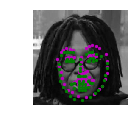

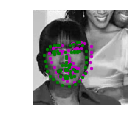

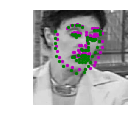

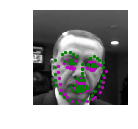

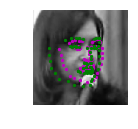

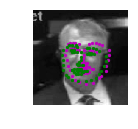

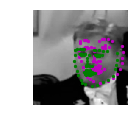

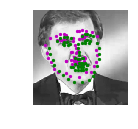

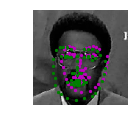

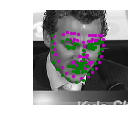

In [21]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

In [22]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

## Load saved model

In [13]:
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

restored_net = Net()
restored_net.load_state_dict(torch.load(model_dir+model_name))

/floyd/home/models.py:45: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.fc1.weight.data)
/floyd/home/models.py:46: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.fc2.weight.data)
/floyd/home/models.py:47: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.fc3.weight.data)
/floyd/home/models.py:49: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.conv1.weight.data)
/floyd/home/models.py:50: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.conv2.weight.data)
/floyd/home/models.py:51: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  I.xavier_uniform(self.conv3.weight.data)
/floyd/home/models.py:52: UserWarning: nn.init

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: 我使用了Adam Optimizer, learning rate =  0.001. Adam optimzer是一种在大量研究中采用的optimizer, Adam optimzer通过计算梯度的一阶矩估计和二阶矩估计可以自适应的调整learning rate. 可以使training快速的收敛。
loss function这里选择了MSE (Mean Squared Error). 因为本项目中的output是人脸关键点的坐标(x, y)， 是连续值，因此是一个regression问题。MSE是一个用用regresion的优秀的loss function. 对于偏离目标较远的值会给予更大的penalty. 因此，本项目中选用了额MSE作为loss function.

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: write your answer here

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: write your answer here

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[-0.00400714  0.06670788 -0.0659541   0.08012098 -0.01332311]
 [-0.067297   -0.01828101 -0.0563692  -0.07262965 -0.07590604]
 [-0.04985804 -0.04344038 -0.01354785  0.02403542 -0.02258999]
 [-0.0007886   0.00924873 -0.02815076 -0.00303519 -0.02403785]
 [ 0.0820023  -0.03741454 -0.06908477  0.0053569   0.05590561]]
(5, 5)


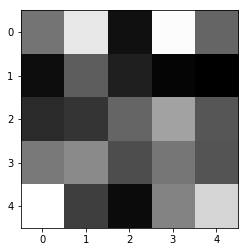

In [14]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

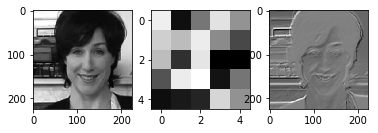

In [24]:
##TODO: load in and display any image from the transformed test dataset
import cv2

index = 5
image = np.squeeze(test_images[index].data.numpy())
plt.subplot(131)
plt.imshow(image, cmap = "gray")


## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 3

plt.subplot(132)
plt.imshow(w[filter_index][0], cmap='gray')

filtered_image = cv2.filter2D(image, -1, w[filter_index][0])
plt.subplot(133)
plt.imshow(filtered_image, cmap="gray")
plt.show()


### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: (does it detect vertical lines or does it blur out noise, etc.) write your answer here

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!